In [2]:
import pandas as pd

# Dữ liệu ban đầu (đơn giản hoá)
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010',
                    'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018', 'E019', 'E020'],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales',
                   'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88, None, 75, 92, 68, 85, None, 79, 90, 73, 86, None, 95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, 45, 38, 42, None, 39, 41, 44, 37, 40,
                     46, 38, 43, None, 39, 41, 45, 37, None, 44],
    'Training_Hours': [5, 3, None, 6, 4, 5, 3, 4, None, 5,
                       2, 6, 7, 3, 5, 4, None, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Male','Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C',
                 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}

df = pd.DataFrame(data)

# Tính tỷ lệ phần trăm giá trị thiếu theo cột
missing_percent = df.isnull().mean() * 100
print(missing_percent)


Employee_ID        0.0
Department         0.0
Performance       15.0
Hours_Worked      15.0
Training_Hours    15.0
Gender            10.0
Location           0.0
dtype: float64


Đề xuất: 
Tạo biểu mẫu điện tử chuẩn hóa (Google Form, nội bộ công ty).

Thiết lập các trường bắt buộc nhập liệu với kiểm tra ràng buộc.

Tự động đồng bộ dữ liệu từ hệ thống chấm công và đào tạo.

Tạo trách nhiệm nhập liệu cho từng phòng ban với người phụ trách rõ ràng.

Phòng sale thì mình phải tạo áp lực kpi thu thập dữ liệu định kì (đầu tháng hoặc cuối tháng).

lí do là Sales thường bị di chuyển, khó kiểm soát theo ngày, nên gom dữ liệu định kỳ sẽ tốt hơn.

Phòng IT thì Tích hợp với hệ thống nội bộ. 

Lí do là IT thường sử lí các tác vụ trực tiếp trên hệ thống nên mình tích hợp hệ thống nội bộ vào giúp cho IT có thể dễ dàng nhập dữ liệu hơn.

Phòng HR Giao nhiệm vụ nhập liệu cho từng nhân viên HR theo ca hoặc theo ngày. 

Lí do HR có quy trình làm việc theo giờ hành chính, phù hợp nhập liệu đều đặn và có trách nhiệm rõ ràng.


Kết quả điền giá trị thiếu:
  Employee_ID Department Location  Performance  Performance_dept_filled  \
0        E001      Sales   Site_A         88.0                88.000000   
1        E002         IT   Site_B          NaN                80.833333   
2        E003         HR   Site_A         75.0                75.000000   
3        E004      Sales   Site_C         92.0                92.000000   
4        E005         IT   Site_B         68.0                68.000000   
5        E006         HR   Site_A         85.0                85.000000   
6        E007      Sales   Site_C          NaN                85.500000   
7        E008         IT   Site_B         79.0                79.000000   
8        E009         HR   Site_A         90.0                90.000000   
9        E010      Sales   Site_C         73.0                73.000000   

   Performance_loc_filled  
0                    88.0  
1                    82.5  
2                    75.0  
3                    92.0  
4    

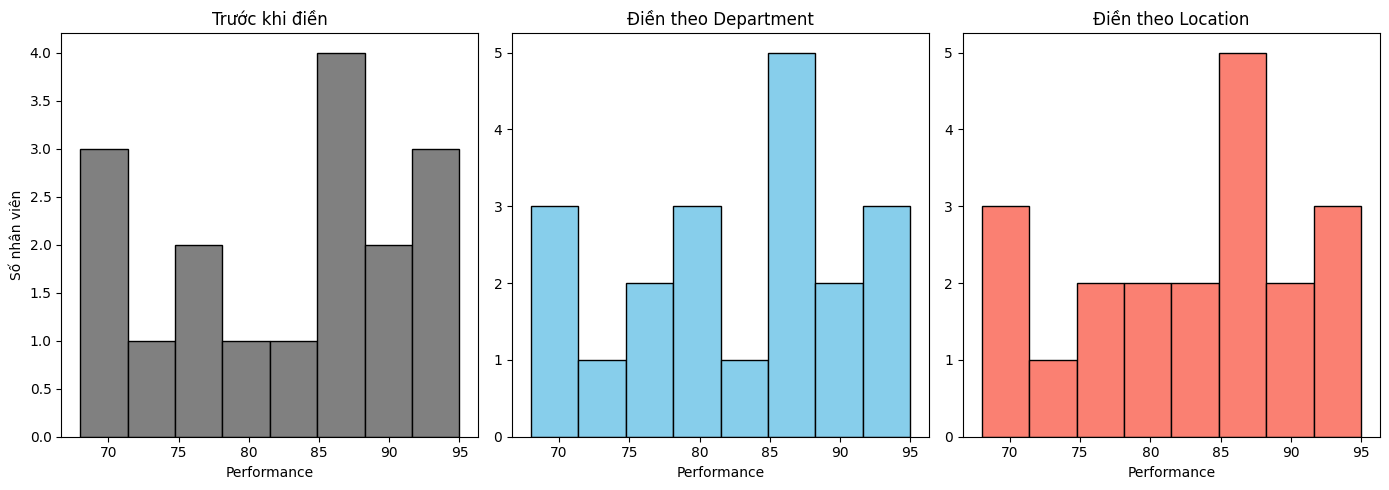

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo lại DataFrame từ dữ liệu
df = pd.DataFrame(data)
# Tính trung bình Performance theo từng Department
dept_means = df.groupby('Department')['Performance'].mean()

# Điền giá trị thiếu bằng trung bình của Department tương ứng
df['Performance_dept_filled'] = df['Performance'].copy()
for dept in dept_means.index:
    mask = (df['Department'] == dept) & (df['Performance'].isnull())
    df.loc[mask, 'Performance_dept_filled'] = dept_means[dept]


# Phương pháp thay thế: điền theo trung vị của Location
location_medians = df.groupby('Location')['Performance'].median()

# Điền giá trị thiếu bằng trung vị của Location tương ứng
df['Performance_loc_filled'] = df['Performance'].copy()
for loc in location_medians.index:
    mask = (df['Location'] == loc) & (df['Performance'].isnull())
    df.loc[mask, 'Performance_loc_filled'] = location_medians[loc]

# Hiển thị kết quả điền giá trị
print("\nKết quả điền giá trị thiếu:")
print(df[['Employee_ID', 'Department', 'Location', 'Performance', 
         'Performance_dept_filled', 'Performance_loc_filled']].head(10))

# So sánh thống kê
print("\nSo sánh các phương pháp:")
print("Trung bình Performance gốc:", df['Performance'].mean())
print("Trung bình sau khi điền theo Department:", df['Performance_dept_filled'].mean())
print("Trung bình sau khi điền theo Location:", df['Performance_loc_filled'].mean())

# Sao lưu dữ liệu gốc để vẽ biểu đồ
performance_before = df['Performance'].copy()

# Tính trung bình theo Department
dept_avg = df.groupby('Department')['Performance'].mean()

# Điền giá trị thiếu bằng trung bình của từng phòng ban
df['Performance_fill_dept'] = df.apply(
    lambda row: dept_avg[row['Department']] if pd.isnull(row['Performance']) else row['Performance'],
    axis=1
)
# Tính trung bình theo Location
loc_avg = df.groupby('Location')['Performance'].mean()

# Điền giá trị thiếu bằng trung bình Location tương ứng
df['Performance_fill_loc'] = df.apply(
    lambda row: loc_avg[row['Location']] if pd.isnull(row['Performance']) else row['Performance'],
    axis=1
)
plt.figure(figsize=(14, 5))

# Trước khi điền
plt.subplot(1, 3, 1)
plt.hist(performance_before.dropna(), bins=8, color='gray', edgecolor='black')
plt.title('Trước khi điền')
plt.xlabel('Performance')
plt.ylabel('Số nhân viên')

# Sau khi điền theo Department
plt.subplot(1, 3, 2)
plt.hist(df['Performance_fill_dept'], bins=8, color='skyblue', edgecolor='black')
plt.title('Điền theo Department')
plt.xlabel('Performance')

# Sau khi điền theo Location
plt.subplot(1, 3, 3)
plt.hist(df['Performance_fill_loc'], bins=8, color='salmon', edgecolor='black')
plt.title('Điền theo Location')
plt.xlabel('Performance')

plt.tight_layout()
plt.show()


đề xuất chọn phương án điền theo location trung bình 

Một số địa điểm như Site_C có nhân viên hiệu suất rất cao (E004, E013).

Phản ánh được đặc điểm môi trường làm việc hoặc điều kiện hỗ trợ ở từng địa điểm.

Giả sử các địa điểm khác nhau có năng suất trung bình khác nhau.

Điền theo Location có thể chính xác hơn nếu:

Các site có cơ sở vật chất hoặc cách quản lý khác nhau.

Năng suất bị ảnh hưởng bởi văn hóa làm việc từng địa điểm.

In [5]:
import numpy as np

# Lấy dữ liệu 'Hours_Worked', bỏ giá trị thiếu
hours = df['Hours_Worked'].dropna()

# Tính độ lệch chuẩn (standard deviation)
std_hours = np.std(hours)
# Tính trung vị (median)
median_hours = np.median(hours)

print(f"Độ lệch chuẩn: {std_hours:.2f} giờ")
print(f"Trung vị: {median_hours} giờ")


Độ lệch chuẩn: 2.87 giờ
Trung vị: 41.0 giờ


Chính sách đề xuất:
Áp dụng khung thời gian làm việc linh hoạt từ 38 – 42 giờ một tuần, kết hợp theo dõi tự động và cảnh báo khi vượt quá giới hạn.

Đặt ngưỡng kiểm soát thời gian:

Giờ làm việc tối ưu: 38 – 42 giờ/tuần 

Nếu vượt quá 42 giờ hoặc dưới 38 giờ sẽ bị gửi cảnh báo nhẹ và theo dõi

Tích hợp theo dõi thời gian làm việc tự động qua hệ thống chấm công hoặc phần mềm nội bộ.

Tư vấn cá nhân hóa:

Nhân viên làm việc dưới  38 giờ, kiểm tra lý do, hỗ trợ nếu cần 

Nhân viên > 42 giờ, phòng tránh kiệt sức, phân bổ lại công việc.

lí do:

Nhân viên làm việc quá ít hoặc quá nhiều đều ảnh hưởng xấu đến hiệu suất. Chính sách giữ họ trong vùng “vàng” về thời gian.

In [8]:
# Lọc bỏ các dòng có giá trị thiếu ở Performance hoặc Hours_Worked
df_corr = df[['Location', 'Hours_Worked', 'Performance']].dropna()

# Tính correlation theo từng Location
corr_by_location = df_corr.groupby('Location').apply(
    lambda g: g['Hours_Worked'].corr(g['Performance'])
)

print(corr_by_location)


Location
Site_A    0.405432
Site_B    0.044189
Site_C    0.968719
dtype: float64


C:\Users\AD\AppData\Local\Temp\ipykernel_21872\1382863673.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_location = df_corr.groupby('Location').apply(



Site_A	Tăng giờ làm hợp lý, giao thêm nhiệm vụ phức tạp cho nhân viên có hiệu suất cao.	

Vì ở Site_A, làm nhiều giờ giúp cải thiện hiệu suất. Nhân viên tại đây có thể chịu áp lực tốt, làm việc hiệu quả hơn theo thời gian.

Site_B	Duy trì giờ làm ổn định, tập trung cải thiện kỹ năng và công cụ hỗ trợ.	

Do không có tương quan rõ ràng giữa giờ làm và hiệu suất, cần tập trung vào nâng cao năng lực hoặc cải tiến quy trình.

Site_C	Giảm khối lượng công việc, áp dụng làm việc linh hoạt hoặc nghỉ giữa giờ.	

Vì làm nhiều giờ khiến hiệu suất giảm → có thể do quá tải, mệt mỏi. Cần tránh làm việc kéo dài và tăng chất lượng thay vì số lượng.

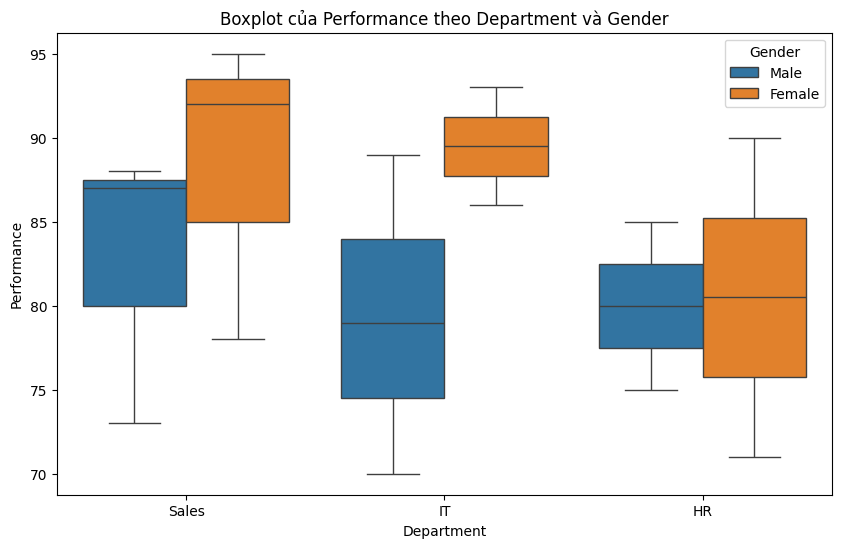

Outliers: 
Empty DataFrame
Columns: [Employee_ID, Department, Gender, Performance]
Index: []


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho Performance theo Department và Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='Performance', hue='Gender')
plt.title('Boxplot của Performance theo Department và Gender')
plt.show()
# Tính IQR cho Performance
Q1 = df['Performance'].quantile(0.25)
Q3 = df['Performance'].quantile(0.75)
IQR = Q3 - Q1

# Xác định outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Performance'] < lower_bound) | (df['Performance'] > upper_bound)]

print(f"Outliers: \n{outliers[['Employee_ID', 'Department', 'Gender', 'Performance']]}")


Đề xuất kế hoạch phỏng vấn cá nhân với các nhân viên outlier
Kế hoạch phỏng vấn:
Lý do phỏng vấn:

Nhân viên có performance outlier (cao hoặc thấp bất thường) có thể gặp vấn đề hoặc có yếu tố tác động đặc biệt.

Mục tiêu là hiểu nguyên nhân gốc rễ của sự khác biệt về hiệu suất, giúp cải thiện hiệu quả làm việc.

Với nhân viên có performance cao ta có thể hỏi những câu hỏi hóc búa hoặc những câu hỏi chuyên sâu vào chuyên môn và cũng như nhân viên có hài lòng với công việc khôngkhông

Với nhân viên có perfornamce thấp ta hỏi về những vấn đề mà nhân viên đang gặp phải và có cần hỗ trợ gì ko.

kết lại phỏng vấn để sàn lọc và tiềm kiếm tiềm năng cho công ty



In [11]:
# Tạo cột Efficiency = Performance / Hours_Worked
df['Efficiency'] = df['Performance'] / df['Hours_Worked']

# Tìm nhân viên có Efficiency cao nhất
max_efficiency_employee = df.loc[df['Efficiency'].idxmax()]

print(f"Nhân viên có Efficiency cao nhất: \n{max_efficiency_employee[['Employee_ID', 'Department', 'Gender', 'Efficiency']]}")


Nhân viên có Efficiency cao nhất: 
Employee_ID        E009
Department           HR
Gender           Female
Efficiency     2.432432
Name: 8, dtype: object


Đề xuất: thêm thưởng cho nhân viên và khi nhân viên duy trì được hạng 1 của mình trong 3 lần liên tục thì sẽ có thưởng thêm nữa

nhằm tạo động lực cho nhân viên duy trì và phảt huy hết thực lực của mình. 

In [12]:
# Điền giá trị thiếu trong Gender bằng mode (giới tính phổ biến nhất)
mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)

# Kiểm tra dữ liệu sau khi điền
print(df['Gender'].isnull().sum())  # Kiểm tra số lượng giá trị thiếu còn lại trong Gender
# Tính tỷ lệ nhân viên nữ trong từng Department
female_ratio_by_department = df.groupby('Department')['Gender'].apply(lambda x: (x == 'Female').mean())

print(female_ratio_by_department)


0
Department
HR       0.500000
IT       0.571429
Sales    0.571429
Name: Gender, dtype: float64


C:\Users\AD\AppData\Local\Temp\ipykernel_21872\1276127991.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(mode_gender, inplace=True)


Đề xuất chính sách đa dạng giới tính cho công ty
Chính sách đề xuất:
Thúc đẩy bình đẳng giới trong tuyển dụng:

Đảm bảo quy trình tuyển dụng công bằng, không phân biệt giới tính, và khuyến khích tuyển dụng nhân viên nữ trong các phòng ban có 

tỷ lệ giới tính không cân bằng.

Đào tạo và phát triển:

Cung cấp các chương trình đào tạo lãnh đạo cho phụ nữ để nâng cao cơ hội thăng tiến trong công ty, đặc biệt ở các phòng ban như IT và Sales, nơi tỷ lệ nữ thấp.

Xây dựng môi trường làm việc thân thiện với nữ giới:

Đảm bảo môi trường làm việc không có phân biệt giới tính, tạo điều kiện thuận lợi cho phụ nữ phát triển nghề nghiệp, như các chính sách linh hoạt về thời gian làm việc (ví dụ, 

nghỉ thai sản, chế độ làm việc từ xa).

C:\Users\AD\AppData\Local\Temp\ipykernel_21872\2161092523.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Training_Hours'].fillna(df['Training_Hours'].mode()[0], inplace=True)
C:\Users\AD\AppData\Local\Temp\ipykernel_21872\2161092523.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

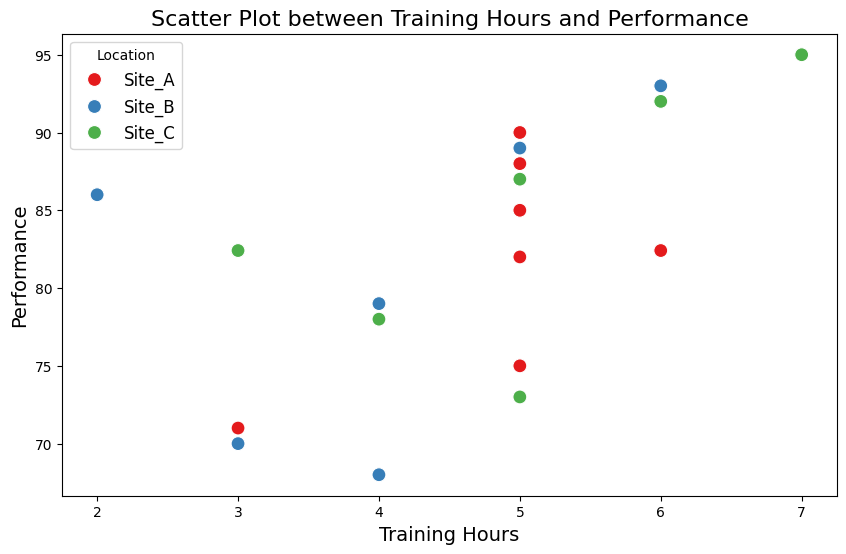

In [ ]:
df = pd.DataFrame(data)
# Điền giá trị thiếu trong Training_Hours và Performance bằng mode và trung bình (ở đây ta chỉ làm mẫu)
df['Training_Hours'].fillna(df['Training_Hours'].mode()[0], inplace=True)
df['Performance'].fillna(df['Performance'].mean(), inplace=True)

# Vẽ scatter plot giữa Training_Hours và Performance, tô màu theo Location
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Training_Hours', y='Performance', hue='Location', palette='Set1', s=100)

# Thêm tiêu đề và nhãn trục
plt.title('Scatter Plot between Training Hours and Performance', fontsize=16)
plt.xlabel('Training Hours', fontsize=14)
plt.ylabel('Performance', fontsize=14)

# Hiển thị đồ thị
plt.legend(title='Location', fontsize=12)
plt.show()

Kế hoạch đào tạo cụ thể cho từng Location:
Site_A:

Nhân viên ở Site_A có Training Hours khá đa dạng nhưng Performance vẫn ở mức cao. Điều này cho thấy việc đào tạo có thể không phải là yếu tố quyết định chính đối với hiệu suất ở địa điểm này.

Kế hoạch đào tạo: Tiếp tục duy trì các chương trình đào tạo chất lượng cao, nhưng tập trung vào việc cải thiện các kỹ năng mềm hoặc quản lý thay vì tăng cường đào tạo kỹ thuật quá nhiều.

Site_B:

Nhân viên ở Site_B có xu hướng có Training Hours thấp và Performance không đồng đều. Điều này cho thấy rằng việc đào tạo chưa đủ hoặc không hiệu quả.

Kế hoạch đào tạo: Tăng cường số giờ đào tạo cho nhân viên, đặc biệt là các khóa đào tạo chuyên môn và kỹ năng thực hành. Đảm bảo rằng nhân viên ở Site B có đủ cơ hội để tham gia các chương trình đào tạo.

Site_C:

Nhân viên ở Site_C có Training Hours và Performance khá đồng đều, cho thấy rằng việc đào tạo đã có tác động tích cực.

Kế hoạch đào tạo: Tiếp tục duy trì và phát triển các chương trình đào tạo hiện có. Hãy tập trung vào các khóa học nâng cao để giữ vững hiệu suất tốt và tiếp tục cải thiện kỹ 

năng cho đội ngũ nhân viên.

lí do đề xuất này có thể tối ưu hóa hệ xuất:

Cá nhân hóa đào tạo: Mỗi Location có đặc điểm và nhu cầu khác nhau về đào tạo. Việc xác định rõ sự phân bố và mối quan hệ giữa Training Hours và Performance giúp công ty xây 

dựng kế hoạch đào tạo phù hợp cho từng nhóm nhân viên.

Tăng cường đào tạo ở những địa điểm cần thiết: Việc tăng cường đào tạo ở Site_B giúp nhân viên ở đây cải thiện hiệu suất. Còn tại Site_C, duy trì chương trình đào tạo hiện tại 

giúp nhân viên tiếp tục duy trì và cải thiện hiệu suất.

Phát triển kỹ năng phù hợp: Đối với Site_A, việc tập trung vào đào tạo kỹ năng mềm có thể giúp nhân viên phát triển thêm khả năng làm việc nhóm, lãnh đạo và giải quyết vấn đề.

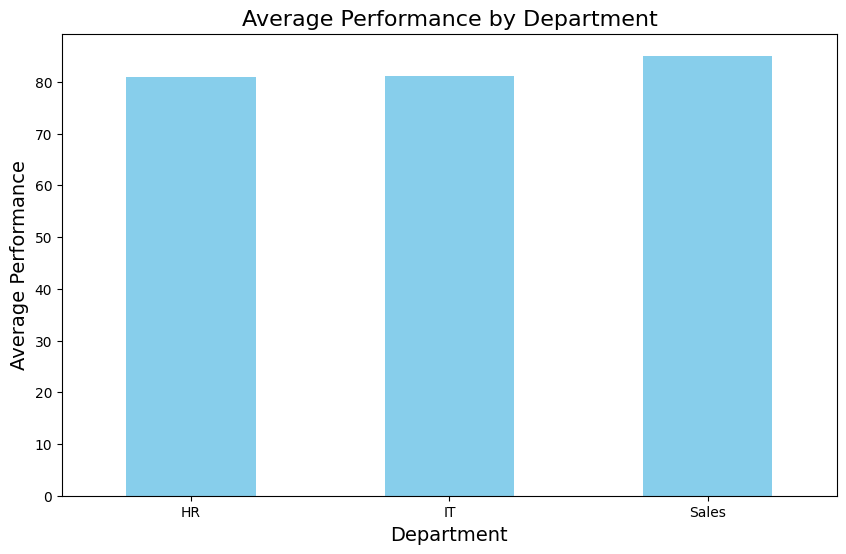

Department
HR       80.901961
IT       81.058824
Sales    85.058824
Name: Performance, dtype: float64

In [18]:
# Điền giá trị thiếu trong Performance và Training_Hours mà không dùng inplace=True
df['Performance'] = df['Performance'].fillna(df['Performance'].mean())
df['Training_Hours'] = df['Training_Hours'].fillna(df['Training_Hours'].mode()[0])

# Tính trung bình Performance của từng Department
department_performance = df.groupby('Department')['Performance'].mean()

# Vẽ bar chart so sánh trung bình Performance của từng Department
plt.figure(figsize=(10, 6))
department_performance.plot(kind='bar', color='skyblue')
plt.title('Average Performance by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Average Performance', fontsize=14)
plt.xticks(rotation=0)
plt.show()

# In kết quả trung bình Performance của từng Department
department_performance

Tăng cường đào tạo chuyên môn và kỹ năng mềm:

Các nhân viên trong phòng ban HR có thể cần được đào tạo thêm về các kỹ năng chuyên môn liên quan đến công việc, cũng như kỹ năng mềm như giao tiếp, quản lý thời gian và giải 

quyết vấn đề. Điều này giúp họ làm việc hiệu quả hơn trong môi trường nhân sự.

Cải thiện công cụ hỗ trợ công việc:


Các công cụ và phần mềm hỗ trợ trong công tác nhân sự (như hệ thống quản lý nhân viên, phần mềm đánh giá hiệu suất) có thể không tối ưu hoặc chưa được sử dụng triệt để. Cung cấp 

những công cụ hiện đại giúp công việc của HR trở nên nhanh chóng và hiệu quả hơn.

Đánh giá lại quy trình làm việc:

Đánh giá các quy trình hiện tại trong phòng ban HR để tìm ra các bước dư thừa hoặc không hiệu quả. Việc tinh gọn quy trình sẽ giúp giảm tải công việc, từ đó nâng cao hiệu suất 

làm việc.

Chế độ khuyến khích và động viên:

Thực hiện các chương trình khuyến khích, động viên cho nhân viên phòng HR để tạo động lực làm việc và cải thiện hiệu suất. Các phần thưởng, phúc lợi hoặc sự công nhận có thể là 

yếu tố thúc đẩy tinh thần làm việc.


Giải thích chiến lược:

Việc tăng cường đào tạo sẽ giúp nhân viên HR nâng cao kỹ năng chuyên môn và nghiệp vụ, đồng thời cải thiện kỹ năng giao tiếp, quản lý mối quan hệ và giải quyết các vấn đề phát 

sinh trong công tác nhân sự.

Cải thiện công cụ làm việc sẽ giúp giảm bớt khối lượng công việc thủ công, tiết kiệm thời gian và nâng cao năng suất.

Đánh giá quy trình làm việc sẽ giúp loại bỏ các bước không cần thiết, từ đó giúp nhân viên HR làm việc hiệu quả hơn.

Chế độ khuyến khích và động viên sẽ giúp tăng cường động lực cho nhân viên HR, từ đó nâng cao hiệu suất làm việc của cả phòng ban.

In [19]:
# Điền giá trị thiếu trong Performance và Hours_Worked để tránh ảnh hưởng đến phân tích
df['Performance'] = df['Performance'].fillna(df['Performance'].mean())
df['Hours_Worked'] = df['Hours_Worked'].fillna(df['Hours_Worked'].mean())

# Lọc nhân viên có Hours_Worked dưới 40 và Performance trên 85
filtered_employees = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]

# In kết quả
filtered_employees

,Employee_ID,Department,Performance,Hours_Worked,Training_Hours,Gender,Location
8,E009,HR,90.0,37.0,5.0,Female,Site_A


Đề xuất nghiên cứu nội bộ:

Dựa trên những nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85, công ty có thể thực hiện một nghiên cứu nội bộ để tìm hiểu các yếu tố giúp họ đạt hiệu suất cao mặc 

dù làm việc ít giờ hơn. Một số yếu tố có thể bao gồm:


Kỹ năng cá nhân: Những nhân viên này có thể sở hữu kỹ năng vượt trội giúp họ hoàn thành công việc nhanh chóng và hiệu quả, chẳng hạn như kỹ năng giải quyết vấn đề, quản lý thời 

gian, hoặc sử dụng công cụ hỗ trợ công việc.

Công cụ và công nghệ: Họ có thể sử dụng các công cụ, phần mềm hoặc hệ thống quản lý công việc hiệu quả hơn, giúp tăng năng suất mà không cần phải dành nhiều giờ làm việc.

Môi trường làm việc: Môi trường làm việc tốt có thể bao gồm sự hỗ trợ từ đồng nghiệp, quản lý, hoặc một không gian làm việc linh hoạt, thuận tiện.

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Điền giá trị thiếu trong Hours_Worked và Training_Hours bằng trung bình
df['Hours_Worked'].fillna(df['Hours_Worked'].mean(), inplace=True)
df['Training_Hours'].fillna(df['Training_Hours'].mean(), inplace=True)

# Tạo mô hình hồi quy tuyến tính
# Lọc các giá trị không thiếu của Performance
train_data = df.dropna(subset=['Performance'])

# Đặc trưng và mục tiêu
X = train_data[['Hours_Worked', 'Training_Hours']]
y = train_data['Performance']

# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Kiểm tra nếu có giá trị thiếu trong Performance
missing_data = df[df['Performance'].isnull()]

# Kiểm tra nếu có dữ liệu thiếu
if not missing_data.empty:
    X_missing = missing_data[['Hours_Worked', 'Training_Hours']]
    y_pred = model.predict(X_missing)

    # Điền giá trị thiếu vào cột Performance
    df.loc[df['Performance'].isnull(), 'Performance'] = y_pred

# So sánh với phương pháp điền trung bình
df_mean_filled = df.copy()
df_mean_filled['Performance'] = df_mean_filled['Performance'].fillna(df_mean_filled['Performance'].mean())

# Hiển thị kết quả so sánh (Ví dụ so sánh trung bình Performance của hai phương pháp)
performance_comparison = pd.DataFrame({
    'Method': ['Linear Regression', 'Mean Imputation'],
    'Mean Performance': [
        df['Performance'].mean(),
        df_mean_filled['Performance'].mean()
    ]
})

print(performance_comparison)


              Method  Mean Performance
0  Linear Regression         82.411765
1    Mean Imputation         82.411765


C:\Users\AD\AppData\Local\Temp\ipykernel_21872\3373774651.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hours_Worked'].fillna(df['Hours_Worked'].mean(), inplace=True)
C:\Users\AD\AppData\Local\Temp\ipykernel_21872\3373774651.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Đề xuất cách tiếp cận lai:

Một cách tiếp cận lai có thể kết hợp cả hai phương pháp — hồi quy và trung bình. Cụ thể, ta có thể áp dụng hồi quy cho những dòng có mối quan hệ mạnh với các biến độc lập 

(Hours_Worked và Training_Hours), còn đối với các dòng còn lại, ta điền bằng giá trị trung bình của Performance.

Lý do đề xuất cách tiếp cận này:

Hồi quy tuyến tính có thể sử dụng thông tin từ các yếu tố khác (Hours_Worked và Training_Hours) để dự đoán chính xác hơn các giá trị thiếu, đặc biệt khi có mối quan hệ rõ ràng 

giữa các yếu tố này và Performance.

Phương pháp trung bình giúp điền nhanh chóng các giá trị thiếu mà không cần tính toán phức tạp, đặc biệt khi các giá trị thiếu không có mối quan hệ rõ ràng với các yếu tố khác.

Kết hợp cả hai giúp ta tận dụng được ưu điểm của cả phương pháp hồi quy và trung bình, vừa giúp cải thiện độ chính xác khi có dữ liệu phù hợp, vừa duy trì sự đơn giản khi không 

thể áp dụng hồi quy một cách hiệu quả.

In [22]:
import scipy.stats as stats

# Tính skewness của Performance
skewness = stats.skew(df['Performance'].dropna())  # dropna() để loại bỏ các giá trị thiếu
print(f"Skewness của Performance: {skewness}")


Skewness của Performance: -0.2829634305688935


Nếu skewness > 0 (Phân phối lệch phải):

Điều này cho thấy phần lớn nhân viên có điểm performance thấp hoặc trung bình, nhưng một số ít nhân viên có điểm performance rất cao.

Đề xuất điều chỉnh: Bạn có thể thay đổi cách tính điểm performance bằng cách áp dụng các tiêu chí đánh giá công bằng hơn, chẳng hạn như:

Cải tiến hệ thống chấm điểm: Thay vì chỉ dựa vào đánh giá tổng quan, có thể bổ sung các chỉ số khác như mức độ cải thiện qua thời gian.

Thêm các yếu tố đánh giá khách quan: Ví dụ, số giờ làm việc, tiến độ công việc hoặc hiệu suất dựa trên các chỉ số cụ thể.

Điều chỉnh điểm số: Áp dụng phương pháp chuẩn hóa hoặc điểm chuẩn để đảm bảo các nhân viên có điều kiện công bằng để thể hiện năng lực.

Nếu skewness < 0 (Phân phối lệch trái):

Điều này cho thấy đa số nhân viên có điểm performance cao, nhưng một số ít nhân viên có điểm rất thấp.

Đề xuất điều chỉnh:

Đặt ra các mục tiêu đánh giá rõ ràng hơn cho nhân viên có performance thấp.

Đào tạo thêm cho những nhân viên có điểm thấp để họ có cơ hội cải thiện và tăng cường cơ hội đạt điểm cao hơn.

Nếu skewness gần 0 (Phân phối đối xứng):

Phân phối điểm performance là khá công bằng, nhưng vẫn có thể tìm cách cải thiện quá trình đánh giá để đảm bảo tính công bằng và chính xác hơn.

Đề xuất điều chỉnh: Cải tiến hệ thống đánh giá để nhân viên có thể phát huy tốt nhất các kỹ năng và được đánh giá công bằng dựa trên các tiêu chí rõ ràng.

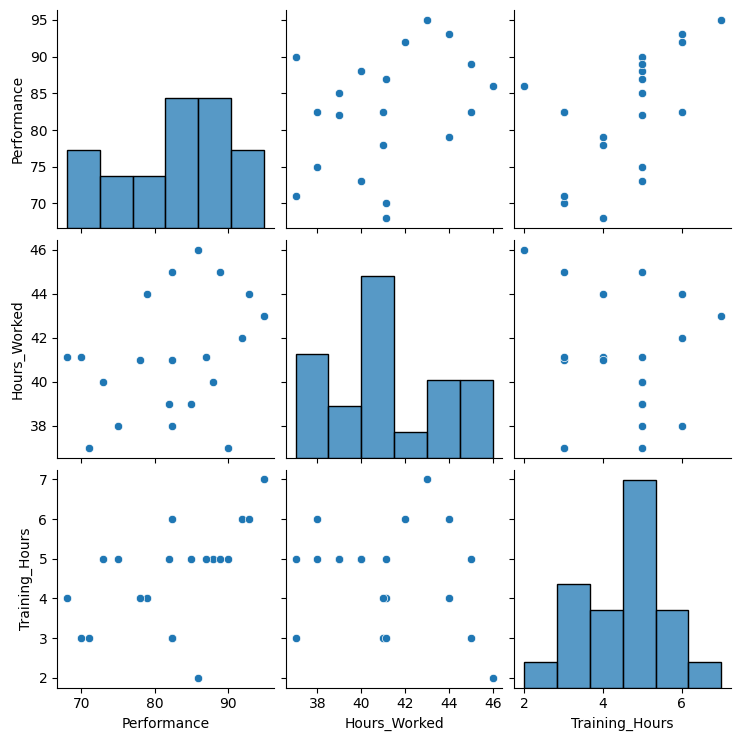

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các cột cần vẽ pairplot
df_pairplot = df[['Performance', 'Hours_Worked', 'Training_Hours']]

# Vẽ pairplot
sns.pairplot(df_pairplot)
plt.show()


Phân tích mối quan hệ và đề xuất mô hình đánh giá hiệu suất mới:

Mối quan hệ giữa Performance, Hours_Worked và Training_Hours:


Performance vs Hours_Worked: Nếu có mối quan hệ tuyến tính hoặc gần tuyến tính giữa thời gian làm việc và hiệu suất, điều này có thể cho thấy nhân viên làm việc nhiều giờ có xu 

hướng đạt điểm performance tốt hơn. Tuy nhiên, có thể có ngoại lệ.

Performance vs Training_Hours: Mối quan hệ này sẽ cho thấy liệu nhân viên có đào tạo nhiều giờ sẽ có điểm hiệu suất cao hơn không.


Hours_Worked vs Training_Hours: Nếu mối quan hệ giữa hai yếu tố này là mạnh mẽ, có thể thấy rằng nhân viên làm việc nhiều giờ cũng có thể tham gia các chương trình đào tạo nhiều 

hơn.

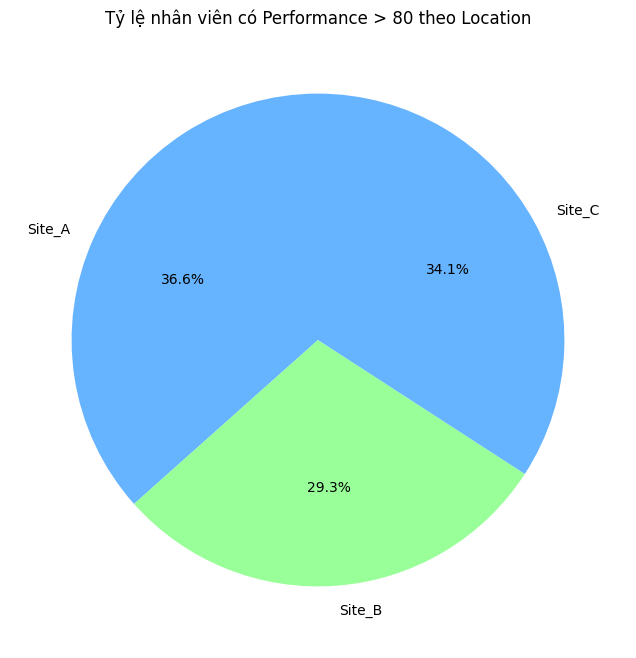

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Nhóm dữ liệu theo Location và tính tỷ lệ nhân viên có Performance > 80
df['Performance_above_80'] = df['Performance'] > 80
grouped = df.groupby('Location')['Performance_above_80'].mean() * 100

# Vẽ pie chart
plt.figure(figsize=(8, 8))
grouped.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, colors=['#66b3ff', '#99ff99'])
plt.title('Tỷ lệ nhân viên có Performance > 80 theo Location')
plt.ylabel('')
plt.show()


Phân tích và đề xuất chiến lược khen thưởng:
Phân tích tỷ lệ:

Dựa vào tỷ lệ nhân viên có Performance > 80 cho từng Location, bạn có thể nhận thấy sự khác biệt giữa các địa điểm làm việc. Một số địa điểm có thể có tỷ lệ cao, trong khi một số khác có tỷ lệ thấp.

Đề xuất chiến lược khen thưởng khác nhau:

Location có tỷ lệ Performance > 80 cao:

Chiến lược: Tăng cường khen thưởng và công nhận sự đóng góp của nhân viên tại các địa điểm này. Các hình thức khen thưởng có thể bao gồm tiền thưởng, thăng chức, hoặc cơ hội học hỏi nâng cao kỹ năng.

Tác động: Việc công nhận sự nỗ lực và thành tích sẽ giúp tạo ra một môi trường làm việc tích cực, động viên nhân viên tiếp tục duy trì hiệu suất cao. Đồng thời, tạo động lực cho các nhân viên khác cũng muốn đạt được mức hiệu suất cao.

Location có tỷ lệ Performance > 80 thấp:

Chiến lược: Áp dụng các chương trình đào tạo, hỗ trợ thêm cho nhân viên ở những địa điểm này để cải thiện năng lực. Các hình thức khen thưởng có thể bao gồm khích lệ bằng các hình thức thưởng nhỏ hơn, nhưng đi kèm với các cơ hội học hỏi và cải thiện.

Tác động: Cung cấp các cơ hội phát triển sẽ giúp nhân viên cảm thấy mình có thể cải thiện và phát triển. Điều này sẽ thúc đẩy tinh thần làm việc và giảm cảm giác không công bằng nếu chỉ có một số ít người được khen thưởng.

Tác động đến tinh thần làm việc:
Khích lệ công bằng: Việc có một chiến lược khen thưởng phân chia hợp lý giữa các địa điểm giúp duy trì công bằng trong công ty, không tạo ra cảm giác phân biệt giữa các nhóm.

Tăng động lực: Các nhân viên thấy rằng những nỗ lực của họ sẽ được công nhận, điều này thúc đẩy tinh thần làm việc và giúp họ tiếp tục cố gắng.

Khuyến khích cải thiện: Ở các địa điểm có tỷ lệ thấp, chiến lược hỗ trợ và phát triển sẽ giúp nhân viên không cảm thấy bị bỏ rơi mà có cơ hội để cải thiện.

In [25]:
def identify_outliers(df, column='Performance', threshold=2):
    # Loại bỏ các giá trị thiếu
    df_clean = df.dropna(subset=[column])
    
    # Tính mean và std của Performance
    mean_performance = df_clean[column].mean()
    std_performance = df_clean[column].std()
    
    # Tính ngưỡng trên và dưới
    upper_limit = mean_performance + threshold * std_performance
    lower_limit = mean_performance - threshold * std_performance
    
    # Xác định các nhân viên có Performance ngoài 2 độ lệch chuẩn
    outliers = df_clean[(df_clean[column] > upper_limit) | (df_clean[column] < lower_limit)]
    
    return outliers[['Employee_ID', column]]

# Xác định các nhân viên có Performance ngoài 2 độ lệch chuẩn
outliers = identify_outliers(df)
print(outliers)


Empty DataFrame
Columns: [Employee_ID, Performance]
Index: []


Đánh giá lại hiệu suất:

Nhân viên có Performance > mean + 2 * std:

Những nhân viên này có thể được đánh giá quá cao so với đa số nhân viên trong công ty. Đánh giá lại có thể bao gồm việc xem xét lại mục tiêu, kết quả công việc, hoặc hiệu suất không liên tục trong thời gian dài.

Nhân viên có Performance < mean - 2 * std:

Những nhân viên này có thể bị đánh giá thấp hoặc gặp khó khăn trong công việc. Cần phải phân tích lý do (ví dụ: khối lượng công việc quá lớn, thiếu đào tạo, vấn đề sức khỏe...) và đưa ra các chương trình hỗ trợ, đào tạo hoặc chuyển đổi công việc cho phù hợp.

Quy trình đánh giá lại:

Bước 1: Gặp gỡ và trao đổi với nhân viên có Performance ngoài ngưỡng 2 độ lệch chuẩn để hiểu rõ các yếu tố ảnh hưởng.

Bước 2: Đánh giá lại mục tiêu công việc và kết quả thực tế. Xem xét các yếu tố khác ngoài chỉ số performance như số giờ làm việc, kỹ năng đào tạo, sự hỗ trợ của nhóm làm việc.

Bước 3: Đưa ra các phương án cải thiện hoặc khen thưởng hợp lý. Các nhân viên có performance rất cao cần được duy trì và khuyến khích, trong khi nhân viên có performance thấp cần được hỗ trợ và đào tạo.

Giải thích cách quy trình này tránh thiên vị trong quản lý:
Chắc chắn công bằng: Quy trình này dựa vào dữ liệu khách quan thay vì cảm nhận của người quản lý, giảm thiểu khả năng có sự thiên vị trong việc đánh giá nhân viên.

Cung cấp cơ hội cải thiện: Thay vì chỉ khen thưởng những nhân viên có performance cao, quy trình này cũng tạo cơ hội cho những người có performance thấp để cải thiện và phát triển.

Khuyến khích sự công bằng trong đánh giá: Quy trình này không chỉ nhìn vào kết quả cuối cùng mà còn xem xét các yếu tố khác nhau, từ đó có cái nhìn toàn diện hơn về nhân viên.

Ann


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)




100.0%
100.0%
100.0%
100.0%


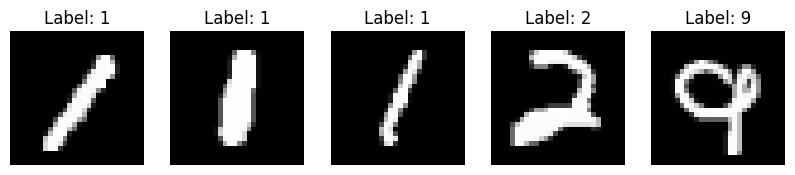

In [27]:
def imshow(images, labels):
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i in range(5):
        axes[i].imshow(images[i].view(28, 28).numpy(), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.show()

# Lấy một batch của dữ liệu
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Hiển thị 5 ảnh mẫu
imshow(images[:5], labels[:5])

In [28]:
from sklearn.model_selection import train_test_split

# Chia tập train thành 80% train và 20% test
train_data, val_data = train_test_split(train_dataset, test_size=0.2, random_state=42)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)

# Kiểm tra dữ liệu sau khi chia
print(f"Số lượng mẫu trong tập train: {len(train_loader.dataset)}")
print(f"Số lượng mẫu trong tập test: {len(val_loader.dataset)}")


Số lượng mẫu trong tập train: 48000
Số lượng mẫu trong tập test: 12000


Batch size nhỏ (ví dụ: 32 hoặc 64)
Ưu điểm:
Học nhanh hơn trên GPU: Batch size nhỏ giúp tăng tính hiệu quả của việc sử dụng bộ nhớ GPU, cho phép tính toán nhanh hơn trong mỗi bước.

Cập nhật mô hình thường xuyên: Việc cập nhật mô hình sau mỗi batch giúp mô hình học nhanh hơn và có thể điều chỉnh tốt hơn với dữ liệu.

Hiệu quả trong việc tránh overfitting: Việc sử dụng batch nhỏ giúp mô hình không dễ bị overfitting và có thể tổng quát hóa tốt hơn.

Nhược điểm:
Độ ổn định của gradient thấp: Cập nhật gradient sau mỗi batch nhỏ có thể gây ra sự dao động lớn, vì gradient có thể không ổn định và không đại diện tốt cho toàn bộ tập dữ liệu.

Thời gian huấn luyện dài hơn: Do việc cập nhật mô hình sau mỗi batch nhỏ, mô hình có thể mất nhiều thời gian để hoàn thành một epoch, so với batch lớn.

Batch size lớn (ví dụ: 128, 256 hoặc 512)
Ưu điểm:
Cập nhật gradient ổn định: Khi sử dụng batch size lớn, gradient tính toán từ nhiều mẫu hơn, giúp ổn định và đại diện tốt hơn cho dữ liệu tổng thể.

Thời gian huấn luyện nhanh hơn: Mỗi bước huấn luyện sẽ xử lý nhiều mẫu hơn, dẫn đến việc giảm số lần cập nhật mô hình trong một epoch. Điều này giúp giảm tổng thời gian huấn luyện.

Dễ dàng song song hóa trên GPU: Khi sử dụng batch size lớn, việc tính toán trên GPU sẽ hiệu quả hơn vì dữ liệu có thể được xử lý song song một cách tối ưu hơn.

Nhược điểm:
Cần nhiều bộ nhớ hơn: Batch size lớn yêu cầu nhiều bộ nhớ GPU hơn, có thể gây tràn bộ nhớ trên các hệ thống có GPU với dung lượng bộ nhớ hạn chế.

Dễ bị overfitting: Cập nhật mô hình ít hơn (vì có ít batch hơn trong mỗi epoch) có thể dẫn đến mô hình học quá tốt trên dữ liệu huấn luyện, gây overfitting.

Batch size trung bình (ví dụ: 64, 128)
Ưu điểm:
Cân bằng giữa tốc độ và độ ổn định: Batch size trung bình thường cho phép mô hình có tốc độ huấn luyện hợp lý mà không gặp vấn đề với sự dao động gradient quá lớn hoặc bộ nhớ không đủ.

Hiệu quả cho đa số tình huống: Đây là một lựa chọn an toàn, đặc biệt là khi bạn không có quá nhiều tài nguyên GPU, nhưng vẫn muốn huấn luyện mô hình hiệu quả.

Nhược điểm:
Không tối ưu cho mọi tài nguyên: Trong trường hợp có rất nhiều bộ nhớ, có thể tận dụng batch size lớn hơn để giảm thời gian huấn luyện, hoặc trong trường hợp bộ nhớ hạn chế, batch size nhỏ hơn có thể giúp tối ưu hóa hiệu suất.

Tối ưu hóa theo đặc điểm của MNIST và tài nguyên máy tính
MNIST là một bộ dữ liệu khá đơn giản (chỉ có ảnh 28x28 pixel với chữ số viết tay), vì vậy bạn có thể sử dụng batch size lớn hơn mà không gặp quá nhiều vấn đề về bộ nhớ. Các chiến lược sau có thể hữu ích:

Batch size = 128 hoặc 256: Đây là một lựa chọn hợp lý nếu bạn có GPU với bộ nhớ từ trung bình đến cao, vì nó giúp giảm thời gian huấn luyện mà vẫn giữ được độ ổn định trong cập nhật gradient.

Sử dụng batch size nhỏ hơn nếu bộ nhớ GPU hạn chế: Nếu GPU của bạn có bộ nhớ hạn chế (ví dụ, chỉ 4GB hoặc ít hơn), bạn có thể chọn batch size = 32 hoặc 64 để đảm bảo không bị tràn bộ nhớ.

Chiến lược đề xuất:
Batch size ban đầu = 64 hoặc 128: Đây là một chiến lược chọn lựa an toàn, giúp cân bằng giữa độ ổn định của gradient và thời gian huấn luyện. Nếu bạn nhận thấy thời gian huấn luyện vẫn quá lâu và GPU có đủ bộ nhớ, bạn có thể thử tăng lên 256.

Kiểm tra với Cross-Validation: Để tìm ra batch size tối ưu, bạn có thể thử nghiệm với một vài giá trị batch size khác nhau và sử dụng cross-validation để kiểm tra độ chính xác của mô hình trên các tập con dữ liệu khác nhau.

Tóm lại:
Batch size nhỏ (32 hoặc 64) cho độ ổn định cao nhưng thời gian huấn luyện dài.

Batch size lớn (128, 256) giúp giảm thời gian huấn luyện, nhưng yêu cầu nhiều bộ nhớ GPU và có thể dễ gây overfitting.

Batch size trung bình (64, 128) là lựa chọn tốt nhất trong hầu hết các trường hợp, đặc biệt nếu không có bộ nhớ GPU quá lớn hoặc quá nhỏ.

Epoch [1/20], Train Loss: 0.3714, Validation Loss: 0.1954
Epoch [2/20], Train Loss: 0.1604, Validation Loss: 0.1371
Epoch [3/20], Train Loss: 0.1094, Validation Loss: 0.1209
Epoch [4/20], Train Loss: 0.0838, Validation Loss: 0.0973
Epoch [5/20], Train Loss: 0.0643, Validation Loss: 0.0936
Epoch [6/20], Train Loss: 0.0512, Validation Loss: 0.0880
Epoch [7/20], Train Loss: 0.0434, Validation Loss: 0.0901
Epoch [8/20], Train Loss: 0.0345, Validation Loss: 0.0854
Epoch [9/20], Train Loss: 0.0280, Validation Loss: 0.0910
Epoch [10/20], Train Loss: 0.0229, Validation Loss: 0.0952
Epoch [11/20], Train Loss: 0.0199, Validation Loss: 0.0972
Epoch [12/20], Train Loss: 0.0175, Validation Loss: 0.1119
Epoch [13/20], Train Loss: 0.0140, Validation Loss: 0.0938
Early stopping triggered!


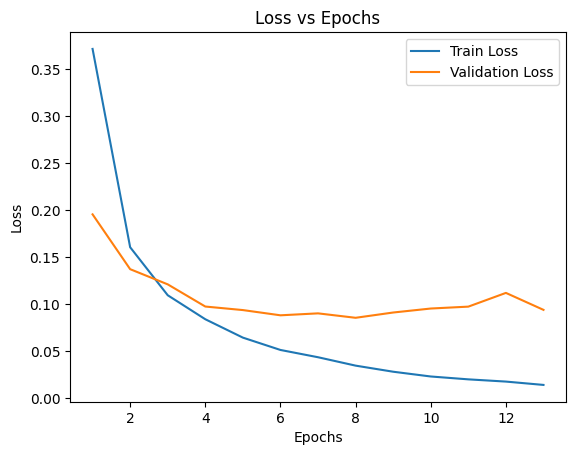

In [36]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.flatten = nn.Flatten()  # Thêm lớp Flatten
        self.fc1 = nn.Linear(784, 128)  # Lớp ẩn đầu tiên (784 -> 128)
        self.fc2 = nn.Linear(128, 64)   # Lớp ẩn thứ hai (128 -> 64)
        self.fc3 = nn.Linear(64, 10)    # Lớp đầu ra (64 -> 10)
        self.relu = nn.ReLU()           # Hàm kích hoạt ReLU
        self.softmax = nn.Softmax(dim=1) # Hàm kích hoạt Softmax cho lớp đầu ra

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))  # Lớp ẩn 1
        x = self.relu(self.fc2(x))  # Lớp ẩn 2
        x = self.fc3(x)             # Lớp đầu ra
        return x

# 3. Khởi tạo mô hình, loss function và optimizer
model = ANN()
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer

# 4. Huấn luyện mô hình với early stopping
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, patience=5):
    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images = images.view(-1, 28*28)  # Flatten các ảnh
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Kiểm tra trên validation set
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.view(-1, 28*28)  # Flatten các ảnh
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Early stopping logic
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0  # Reset patience
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered!")
                break

    return train_losses, val_losses

# Huấn luyện mô hình
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, patience=5)

# Vẽ biểu đồ Loss
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

Đề xuất 1: Tăng số lượng nơ-ron trong các lớp ẩn
Nếu mô hình của bạn đang bị underfitting (loss không giảm nhiều hoặc vẫn cao), một chiến lược để cải thiện hiệu suất là tăng số nơ-ron trong các lớp ẩn. Điều này giúp mô hình có thể học được nhiều tính năng phức tạp hơn từ dữ liệu.
Giải thích:

Việc tăng số lượng nơ-ron sẽ giúp mô hình học được nhiều tính năng hơn từ dữ liệu, đặc biệt là đối với bộ dữ liệu phức tạp hơn.

Thêm một lớp ẩn nữa có thể giúp mô hình học các tính năng phức tạp hơn, nhưng cũng cần chú ý tránh overfitting nếu dữ liệu huấn luyện không đủ lớn.
Đề xuất 2: Thêm Dropout để tránh Overfitting
Nếu mô hình của bạn có hiện tượng overfitting (mô hình học quá tốt trên dữ liệu huấn luyện nhưng không tổng quát hóa tốt cho dữ liệu kiểm tra), bạn có thể thêm Dropout để giảm overfitting.
Giải thích:

Dropout giúp giảm overfitting bằng cách ngẫu nhiên loại bỏ một số nơ-ron trong mỗi lần cập nhật. Điều này giúp mô hình không phụ thuộc quá nhiều vào các nơ-ron cụ thể và học được các đặc trưng tổng quát hơn.

Tỷ lệ dropout có thể điều chỉnh, thường từ 0.3 đến 0.5.
Đề xuất 3: Sử dụng Batch Normalization
Batch Normalization giúp cải thiện tốc độ huấn luyện và ổn định hóa quá trình huấn luyện.
Giải thích:

Batch Normalization chuẩn hóa đầu ra của mỗi lớp ẩn, giúp cải thiện quá trình huấn luyện và giúp mô hình hội tụ nhanh hơn.

Điều này có thể giúp mô hình ổn định hơn và có thể giảm số lần huấn luyện cần thiết.

Accuracy on the test set: 97.31%


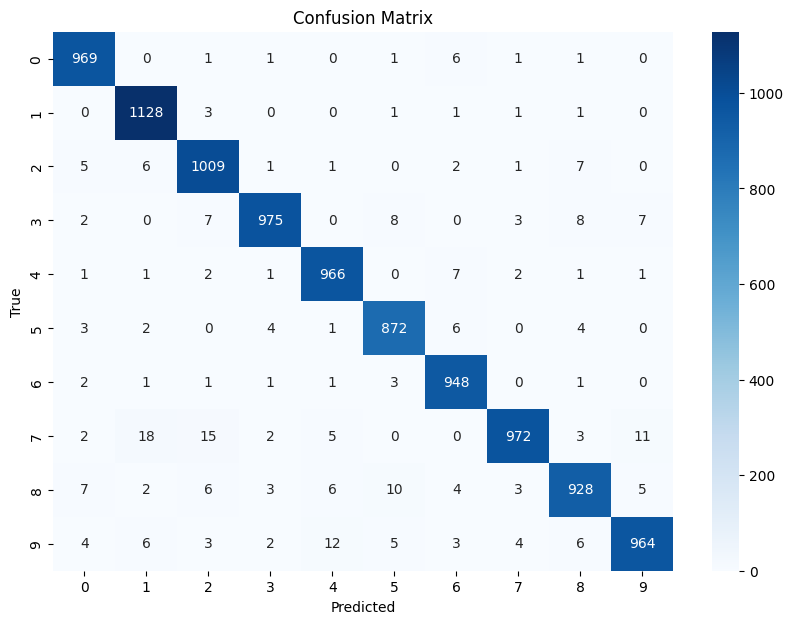

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Đánh giá mô hình trên tập test
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Chuyển mô hình về chế độ đánh giá
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28*28)  # Flatten các ảnh
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_labels.extend(labels.numpy())
            all_preds.extend(predicted.numpy())
    
    accuracy = correct / total * 100
    print(f"Accuracy on the test set: {accuracy:.2f}%")
    
    # Tính confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    return accuracy, cm

# Đánh giá mô hình
accuracy, cm = evaluate_model(model, test_loader, criterion)

# Vẽ confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Nếu accuracy
dưới 95%, phân tích các chữ số bị nhầm lẫn nhiều nhất trong confusion matrix, đề xuất một cách
cải thiện mô hình dựa trên đặc điểm của những chữ số này (không chỉ dùng Dropout hay tăng
epochs).
Nếu dưới 95% thì ta có thể kiểm tra lại các chữ số bị nhầm lẫn
sử dụng augmentation giúp mô hình nhìn thấy nhiều kiểu viết khác nhau của chữ số, từ đó giảm khả năng nhầm lẫn.
hêm Lớp Convolutional (CNN)
Mô hình của bạn hiện tại có thể đang sử dụng một mạng nơ-ron đầy đủ kết nối (fully connected), nhưng nếu bạn thay thế bằng một mạng nơ-ron tích chập (CNN), nó sẽ giúp mô hình học các đặc trưng không gian của hình ảnh, đặc biệt là các đặc trưng đặc trưng của chữ số viết tay.

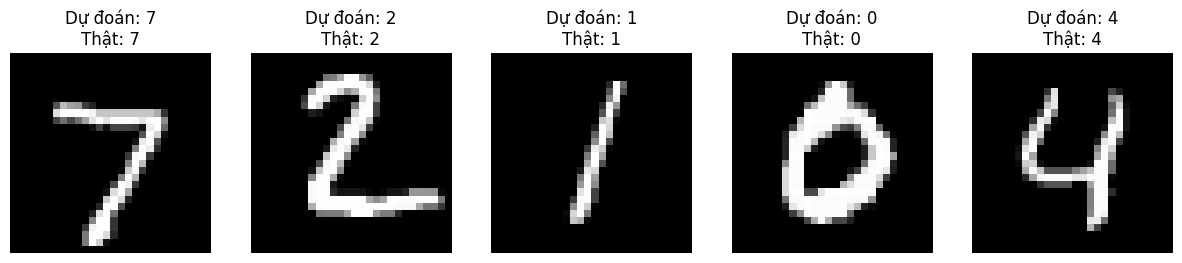

In [37]:
import torch

# Xác định device (sử dụng GPU nếu có, ngược lại sử dụng CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hàm trực quan hóa dự đoán
def visualize_prediction():
    model.to(device)  # Đảm bảo mô hình được chuyển sang device đúng (GPU/CPU)
    model.eval()  # Chuyển mô hình sang chế độ đánh giá (tắt dropout, batch norm nếu có)
    
    # Lấy một batch từ tập kiểm tra
    images, labels = next(iter(test_loader))  
    images, labels = images.to(device), labels.to(device)  # Chuyển sang GPU/CPU
    
    outputs = model(images)  # Dự đoán trên batch
    _, predicted = torch.max(outputs, 1)  # Lấy chỉ số lớp dự đoán
    
    # Vẽ 5 ảnh đầu tiên
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Tạo lưới 1x5 để vẽ 5 ảnh
    for i in range(5):  # Lặp qua 5 ảnh đầu
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Vẽ ảnh (chuyển về CPU, bỏ kênh 1)
        axes[i].set_title(f"Dự đoán: {predicted[i].item()}\nThật: {labels[i].item()}")  # Ghi nhãn dự đoán và thật
        axes[i].axis('off')  # Tắt trục tọa độ
    plt.show()  # Hiển thị hình

visualize_prediction()  # Gọi hàm để vẽ
